In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("final_pbd.csv", names=['price', 'weight'], sep=';')

df.head()

,price,weight
0,400,15.0
1,450,12.2
2,620,10.5
3,750,14.3
4,900,12.3


In [3]:
fronts = []
nfront = 1

# we'll need the original data for plotting
odf = df.copy()

while len(df) > 0:
    ifront = []

    isDominant = True
    
    for i in df.index.values:
        isDominant = True
        for j in df.index.values:
            if i == j:
                continue
            if df['weight'][j] < df['weight'][i] and df['price'][j] < df['price'][i]:
                isDominant = False
        if isDominant:
            ifront.append(i)

    fronts.append(df.loc[ifront])
    print("elements in Pareto front {}:".format(nfront), ifront)
    df = df.drop(index=ifront)
    nfront += 1


plt.show()

elements in Pareto front 1: [0, 1, 2, 6, 7, 13, 16, 18, 20]
elements in Pareto front 2: [3, 4, 8, 12, 17, 19]
elements in Pareto front 3: [5, 9, 11, 14]
elements in Pareto front 4: [10, 15]


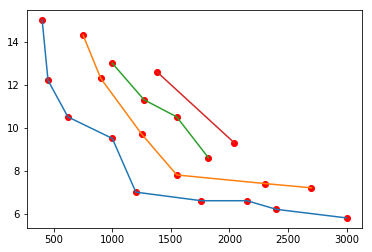

In [4]:
x = odf['price'].values
y = odf['weight'].values
plt.plot(x, y, 'ro')

for fdf in fronts:
    pfx = fdf['price'].values
    pfy = fdf['weight'].values
    plt.plot(pfx, pfy)

plt.show()